In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('C:\\Users\\tvimal\\Desktop\\PL_MODELS\\CC_BASE\\DATA\\CC_backtest_data_50k.xlsx')
df.head()

,#_cards,ANNUAL_SALARY,Age_Band,UNBILLED_ENR_C,SPENDING,new_scv_party_id,CUST_CARD_TYPE3_1,CUST_GRADE,CUST_LIMIT,ENR_1,...,avg_UTIL_3m,avg_UTIL_6m,avg_UTIL_diff_3m_1m,avg_UTIL_diff_6m_1m,avg_UTIL_diff_3m_6m,avg_PREV_BAL_3,avg_PREV_BAL_6,PREV_BAL_diff_3m_1m,PREV_BAL_diff_6m_1m,PREV_BAL_diff_3m_6m
81714,1,106115,j.61-70,0.00,2324.90,1989419,06. CASH REBATE,A,10000.0,2224.90,...,0.077345,0.038577,0.347634,0.173389,0.498768,2418.966667,2328.266667,1.065813e-05,0.000005,0.498768
67123,1,24000,j.61-70,0.00,397.50,11684697,02. PLATINUM,A,6000.0,1101.45,...,0.055222,0.030342,0.300814,0.165283,0.549454,882.273333,983.033333,2.086348e-05,0.000011,0.549454
128405,1,28800,c.26-30,0.00,465.06,30436267,06. CASH REBATE,B,4500.0,3517.01,...,0.279994,0.142304,0.358252,0.182077,0.508238,3780.176667,3754.920000,2.468970e-05,0.000013,0.508238
75025,1,134000,g.46-50,0.00,341.25,10864231,05. CO-BRAND,A,33500.0,134.21,...,0.001344,0.010884,0.335438,2.716754,8.099117,953.610000,2202.191667,4.697471e-07,0.000004,8.099117
140372,1,50000,g.46-50,23329.42,0.00,5187143,02. PLATINUM,C,45000.0,16060.38,...,0.117280,0.111510,0.328609,0.312443,0.950805,983.836667,10413.331667,3.973551e-05,0.000038,0.950805


In [277]:
df.columns

Index(['#_cards', 'ANNUAL_SALARY', 'Age_Band', 'UNBILLED_ENR_C', 'SPENDING',
       'new_scv_party_id', 'CUST_CARD_TYPE3_1', 'CUST_GRADE', 'CUST_LIMIT',
       'ENR_1', 'Ethnic', 'Gender', 'Marital_status', 'N_SPENDING',
       'Nationality', 'Occupation_Group', 'Open_PL_Jul16Jun18', 'PAYRATIO_1',
       'PREV_BAL_1', 'PYMTDESC_1', 'PYMTDESC_3', 'PYMTDESC_6', 'PYMT_1',
       'Seg_Locality', 'UTIL_1', 'new_scv_party_id.1', 'avg_pymt_3m',
       'avg_pymt_6m', 'avg_pymt_diff_3m_1m', 'avg_pymt_diff_6m_1m',
       'avg_pymt_diff_3m_6m', 'avg_PAYRATIO_3m', 'avg_PAYRATIO_6m',
       'avg_PAYRATIO_diff_3m_1m', 'avg_PAYRATIO_diff_6m_1m',
       'avg_PAYRATIO_diff_3m_6m', 'avg_ENR_3m', 'avg_ENR_6m',
       'avg_ENR_diff_3m_1m', 'avg_ENR_diff_6m_1m', 'avg_ENR_diff_3m_6m',
       'avg_UTIL_3m', 'avg_UTIL_6m', 'avg_UTIL_diff_3m_1m',
       'avg_UTIL_diff_6m_1m', 'avg_UTIL_diff_3m_6m', 'avg_PREV_BAL_3',
       'avg_PREV_BAL_6', 'PREV_BAL_diff_3m_1m', 'PREV_BAL_diff_6m_1m',
       'PREV_BAL_diff_3m

In [276]:
for index, row in dfr.iterrows():
    if dfr.loc[index, 'ANNUAL_SALARY'] > 1000:
        dfr.loc[index,'Long1'] = 'Y'
    else:
        dfr.loc[index,'Long1'] = 'N'
print (dfr)

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


        #_cards  ANNUAL_SALARY Age_Band Long Long1
177219        1          48000  e.36-40    Y     Y
113508        1         152556  c.26-30    Y     Y
107195        1          84000  h.51-55    Y     Y
24881         1          23424  d.31-35    Y     Y
161448        1          30000  f.41-45    Y     Y
147317        1          48000  h.51-55    Y     Y
21361         1          48000  h.51-55    Y     Y
169875        2          73000  d.31-35    Y     Y
82200         3          82800  f.41-45    Y     Y
68174         1              0  j.61-70    N     N


In [261]:
#df.groupby(['PREV_BAL_1']).mean()
df.groupby(['PREV_BAL_1', 'Open_PL_Jul16Jun18']).mean()

,,#_cards,ANNUAL_SALARY,UNBILLED_ENR_C,SPENDING,new_scv_party_id,CUST_LIMIT,ENR_1,N_SPENDING,PAYRATIO_1,PYMT_1,...,avg_UTIL_3m,avg_UTIL_6m,avg_UTIL_diff_3m_1m,avg_UTIL_diff_6m_1m,avg_UTIL_diff_3m_6m,avg_PREV_BAL_3,avg_PREV_BAL_6,PREV_BAL_diff_3m_1m,PREV_BAL_diff_6m_1m,PREV_BAL_diff_3m_6m
PREV_BAL_1,Open_PL_Jul16Jun18,,,,,,,,,,,,,,,,,,,,,
-242998.98,0,1.0,225735.0,0.00,428733.90,5484106.0,30000.0,1548.56,321.0,-0.757972,184186.36,...,-1.339160,-0.306255,-25.943310,-5.933022,0.228692,-122048.706667,-50732.530000,3.657447e-06,8.364280e-07,0.228692
-71982.33,0,1.0,188676.0,249.88,23571.65,6344224.0,15000.0,-63010.84,25.0,-0.208385,15000.00,...,-1.458717,-0.666891,0.347254,0.158756,0.457176,-63007.886667,-58086.821667,7.717115e-06,3.528081e-06,0.457176
-71355.32,0,1.0,85000.0,0.00,190770.35,5115731.0,60000.0,-91649.28,36.0,-2.957934,211064.31,...,-0.464831,-0.235170,0.304311,0.153959,0.505926,-76350.636667,-80586.011667,2.029370e-06,1.026711e-06,0.505926
-61061.49,0,1.0,120000.0,0.00,383543.15,5600455.0,5000.0,1097.73,162.0,-5.263284,321383.93,...,-1.307306,-0.404015,-5.954589,-1.840231,0.309044,-24385.870000,-14938.273333,1.786972e-05,5.522534e-06,0.309044
-54762.90,0,1.0,24000.0,0.00,893846.11,33875219.0,5000.0,-30244.49,485.0,-15.874391,869327.70,...,-3.078177,-1.336550,0.508882,0.220958,0.434202,-47093.083333,-43724.371667,2.178789e-05,9.460342e-06,0.434202
-52692.50,0,2.0,70000.0,0.00,444871.90,4315872.0,60000.0,54096.98,15.0,-6.416139,338082.42,...,-0.118268,-0.086210,-0.131173,-0.095618,0.728940,-59927.590000,-35043.471667,6.578387e-07,4.795248e-07,0.728940
-39854.68,0,1.0,160000.0,0.00,4981.44,2773019.0,51000.0,-34873.24,16.0,0.000000,0.00,...,-0.152712,-0.027069,0.223332,0.039587,0.177258,-11677.086667,-3683.710000,4.359304e-06,7.727199e-07,0.177258
-34988.84,0,3.0,45600.0,0.00,70784.11,2069692.0,12000.0,-14412.47,33.0,-1.434964,50207.74,...,-0.731554,-0.451781,0.609101,0.376159,0.617563,-31583.646667,-32796.108333,7.720814e-06,4.768091e-06,0.617563
-31641.51,0,2.0,80000.0,39530.55,58638.90,706828.0,45000.0,9504.24,9.0,-0.978195,30951.56,...,0.091388,0.032347,0.432700,0.153153,0.353947,-15589.273333,-20342.583333,-1.954089e-06,-6.916440e-07,0.353947


In [299]:
lit=[ 'avg_PAYRATIO_3m', 'avg_PAYRATIO_6m','avg_ENR_3m', 'avg_ENR_6m','avg_UTIL_6m','avg_UTIL_3m']

avg_PAYRATIO_3m


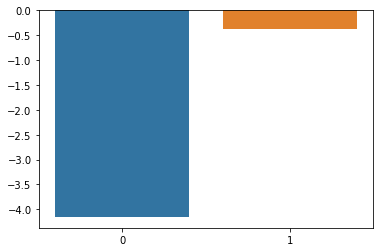

avg_PAYRATIO_6m


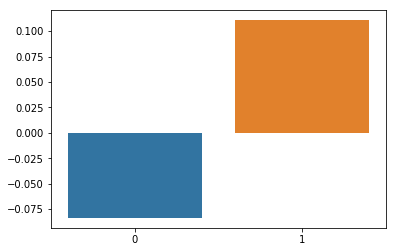

avg_ENR_3m


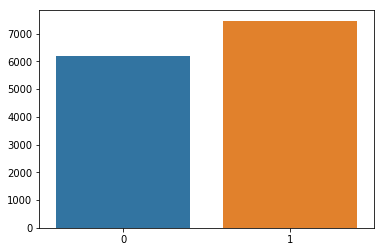

avg_ENR_6m


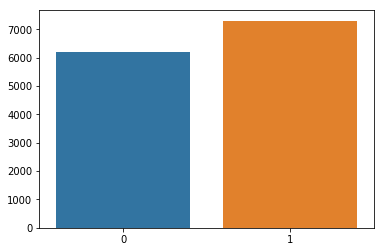

avg_UTIL_6m


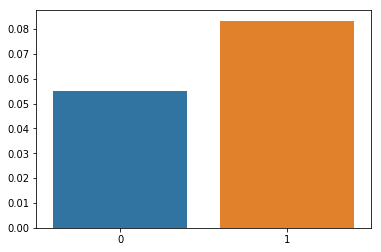

avg_UTIL_3m


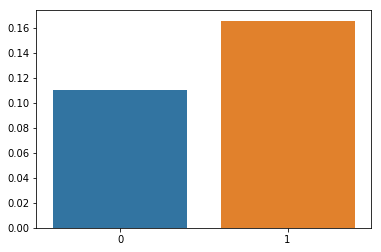

mission accomplished


In [303]:
#without user defined function
lit=[ 'avg_PAYRATIO_3m', 'avg_PAYRATIO_6m','avg_ENR_3m', 'avg_ENR_6m','avg_UTIL_6m','avg_UTIL_3m']
for var in lit:
    
    dff=df[[var,'Open_PL_Jul16Jun18']]
    g=dff.groupby('Open_PL_Jul16Jun18').agg('mean')
    dfs = pd.DataFrame(g, index=[0,1])
    h=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
    print(var)
    plt.show(h)
else:
    print('mission accomplished')

avg_PAYRATIO_3m


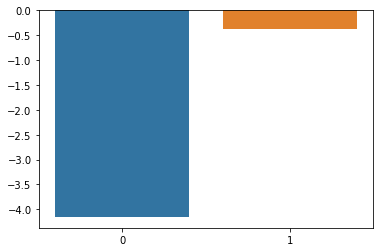

avg_PAYRATIO_6m


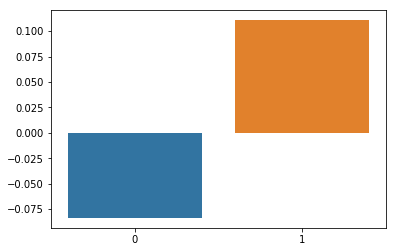

avg_ENR_3m


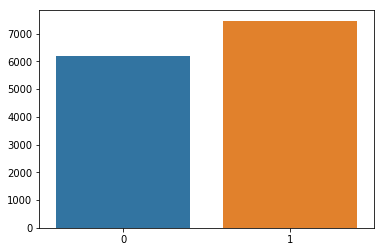

avg_ENR_6m


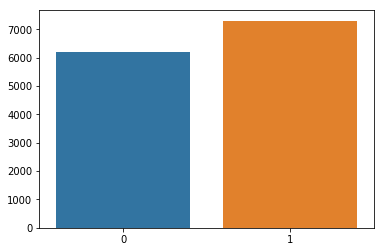

avg_UTIL_6m


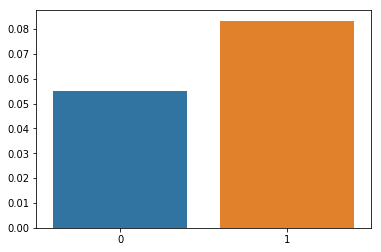

avg_UTIL_3m


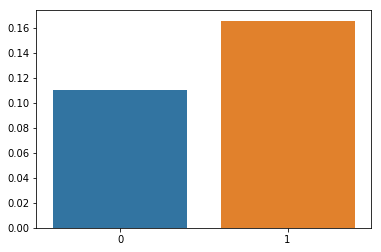

mission accomplished


In [304]:
#with user defined function
lit=[ 'avg_PAYRATIO_3m', 'avg_PAYRATIO_6m','avg_ENR_3m', 'avg_ENR_6m','avg_UTIL_6m','avg_UTIL_3m']
for var in lit:
    def means(var):
        dff=df[[var,'Open_PL_Jul16Jun18']]
        g=dff.groupby('Open_PL_Jul16Jun18').agg('mean')
        dfs = pd.DataFrame(g, index=[0,1])
        h=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
    print(var)
    plt.show(means(var))
else:
    print('mission accomplished')
#print(means('PREV_BAL_1'))
#print(means('avg_ENR_6m'))

AxesSubplot(0.125,0.125;0.775x0.755)


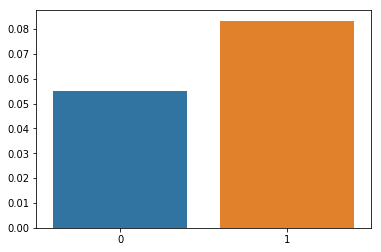

In [171]:
print(means('avg_UTIL_6m'))


In [142]:
dff=df[['PREV_BAL_1','Open_PL_Jul16Jun18']]
g=dff.groupby('Open_PL_Jul16Jun18').agg('mean')
dfs = pd.DataFrame(g, index=[0,1])
dfs
dfs.plot(x=dfs.index, y='PREV_BAL_1')

KeyError: "Int64Index([0, 1], dtype='int64') not in index"

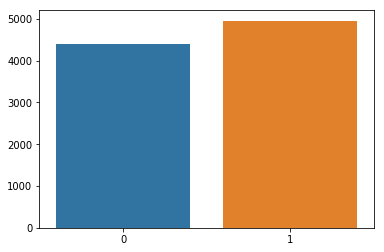

In [156]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [155]:
np.array(dfs.values).ravel()

array([4390.98667344, 4957.85596585])

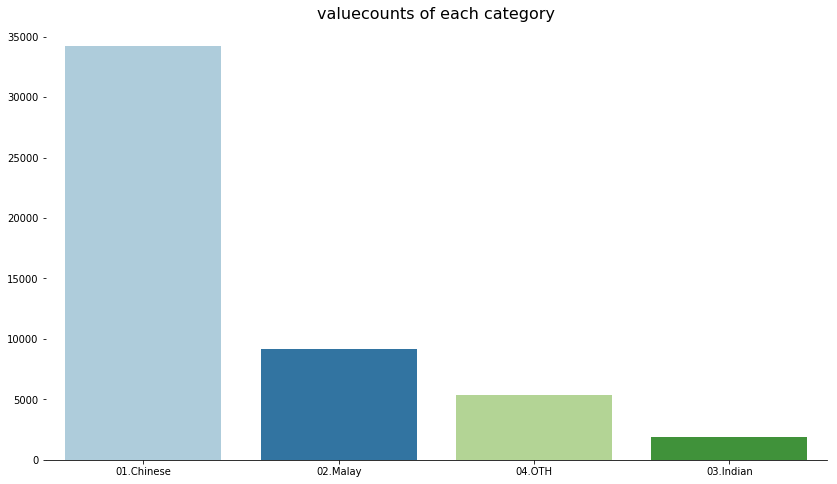

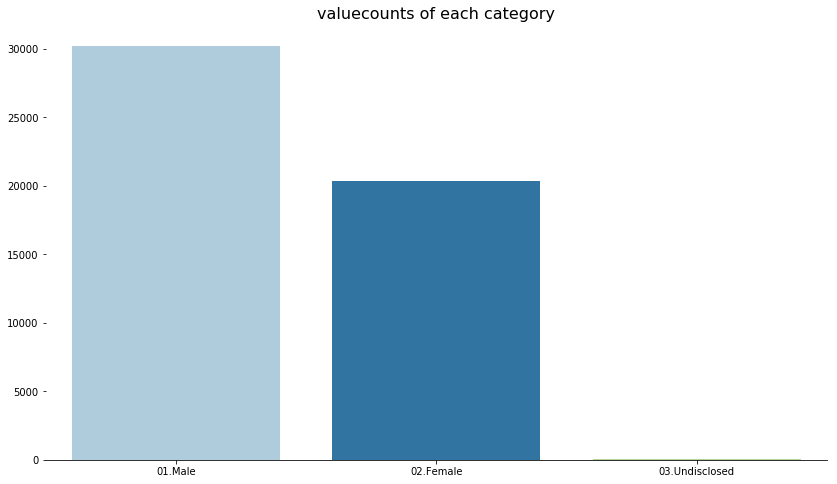

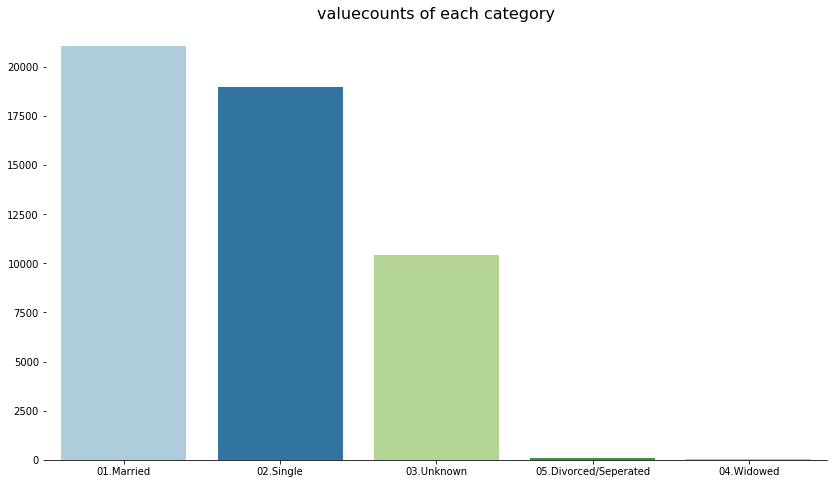

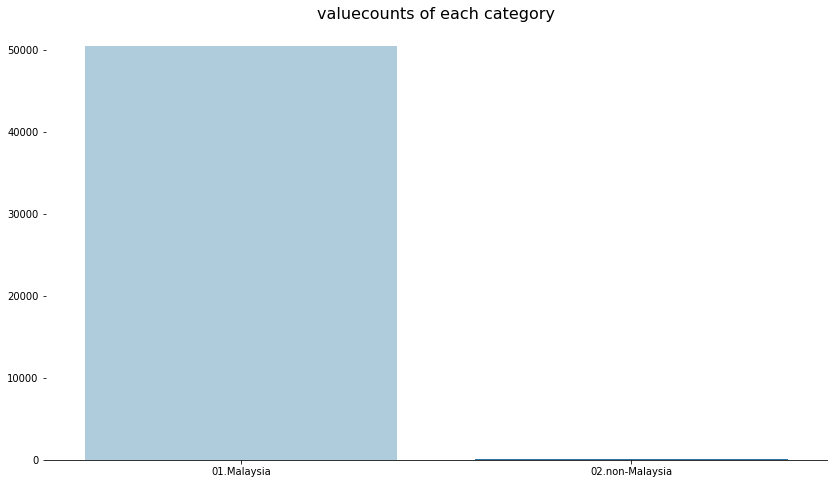

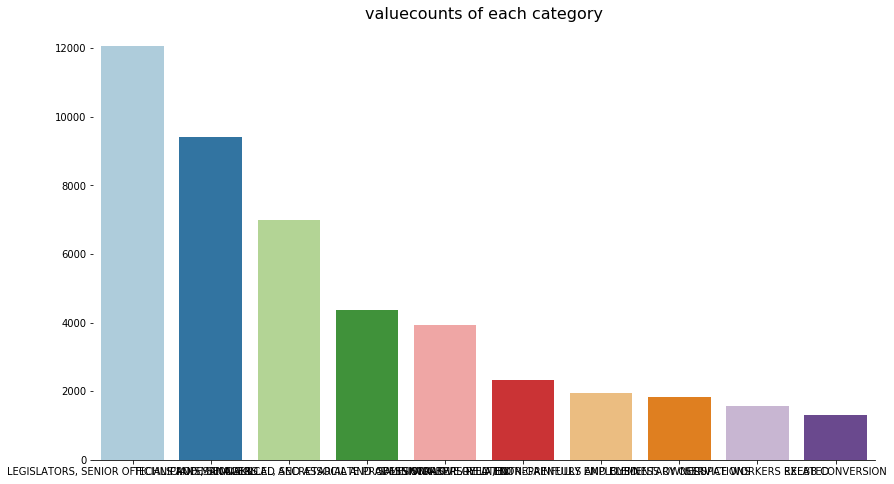

In [305]:
cat=['Ethnic', 'Gender', 'Marital_status','Nationality', 'Occupation_Group']
for column in cat:
    def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
        column_count = df[column].value_counts()[:limit]

        fig = plt.figure(figsize=(14, 8))
        sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
    plt.show(plot_categorical_count(df, column, title='valuecounts of each category', limit=10))

In [6]:
for var in cat:
    def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
        column_count = df[column].value_counts()[:limit]

        fig = plt.figure(figsize=(14, 8))
        sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
    plot_categorical_count(df, column='Age_Band', title='valuecounts of each category', limit=10)

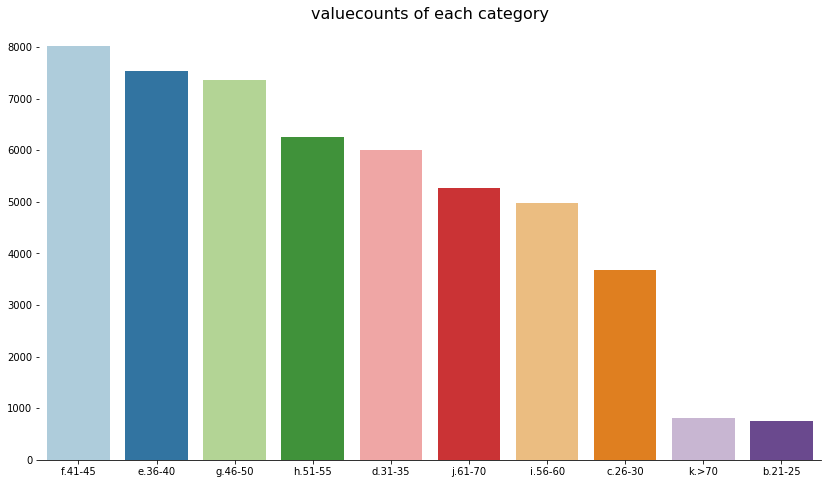

In [9]:
plot_categorical_count(df, column='Age_Band', title='valuecounts of each category', limit=10)

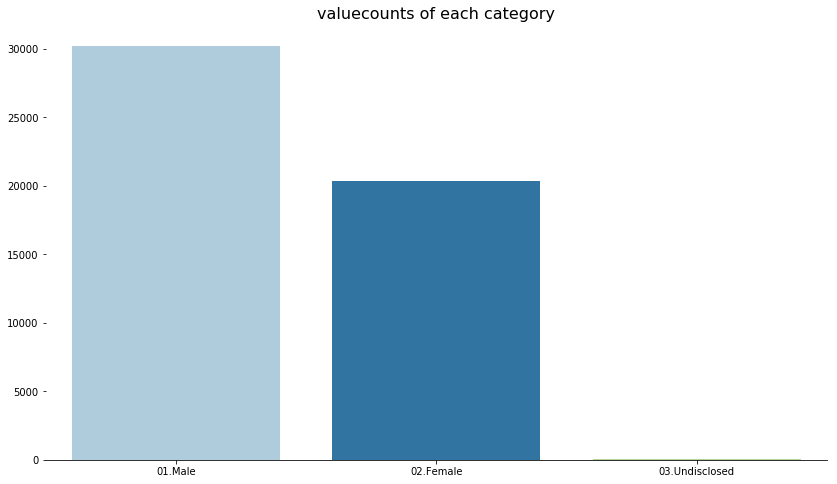

In [10]:
plot_categorical_count(df, column='Gender', title='valuecounts of each category', limit=10)

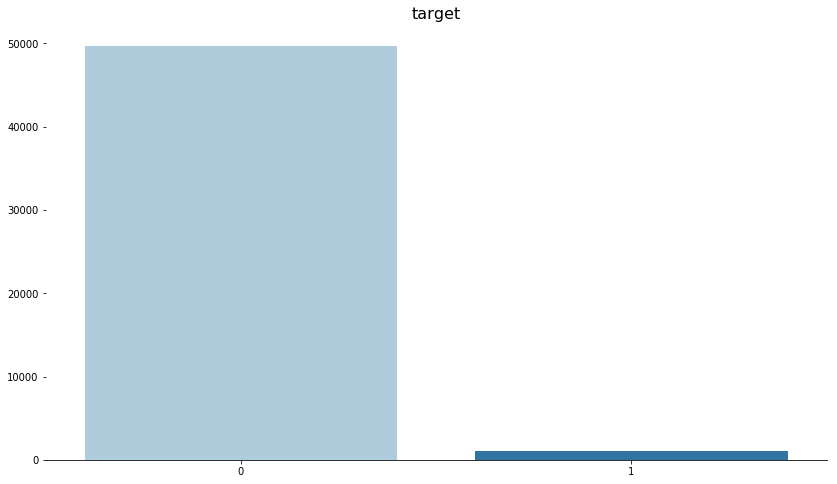

In [11]:
plot_categorical_count(df, 'Open_PL_Jul16Jun18', title='target')

In [24]:
def contribution(var):
    open_source_count = df['Open_PL_Jul16Jun18'].value_counts()

    plt.figure(figsize=(14, 8))
    sns.countplot(df[var], palette='Paired', hue=df['Open_PL_Jul16Jun18'])
    sns.despine(left=True)
    plt.title('gender contribute or not', fontsize=16)

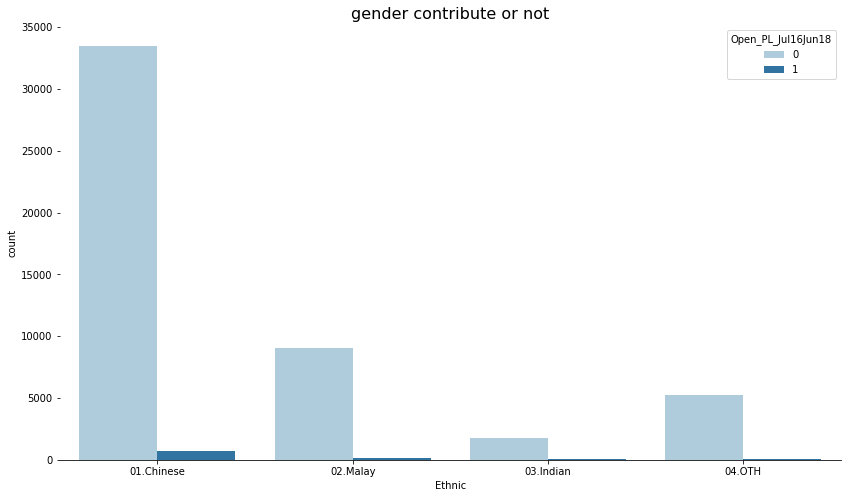

In [25]:
contribution('Ethnic')

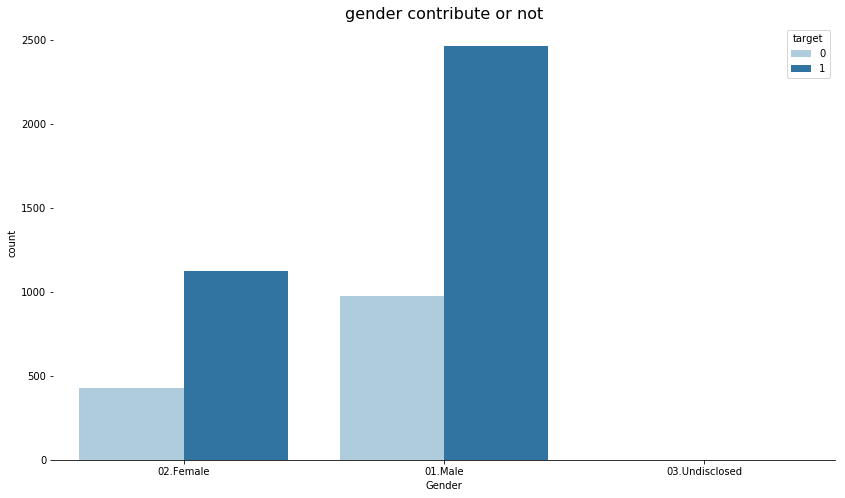

In [43]:
contribution('Gender')

In [60]:
def plot_heatmap(df, variable):
    l = []
    for name, group in df.groupby('Age_Band'):
        dff = pd.DataFrame(group[variable].value_counts() / group[variable].count()) 
        dff['Age_Band'] = name
        dff['rate'] = dff.index
        l.append(dff)
    fig = plt.figure(figsize=(14, 8))
    df_2 = pd.concat(l)
    dff = df_2.pivot_table(index='Age_Band', columns='rate')
    sns.heatmap(dff, cmap="YlGnBu", linewidths=.3)

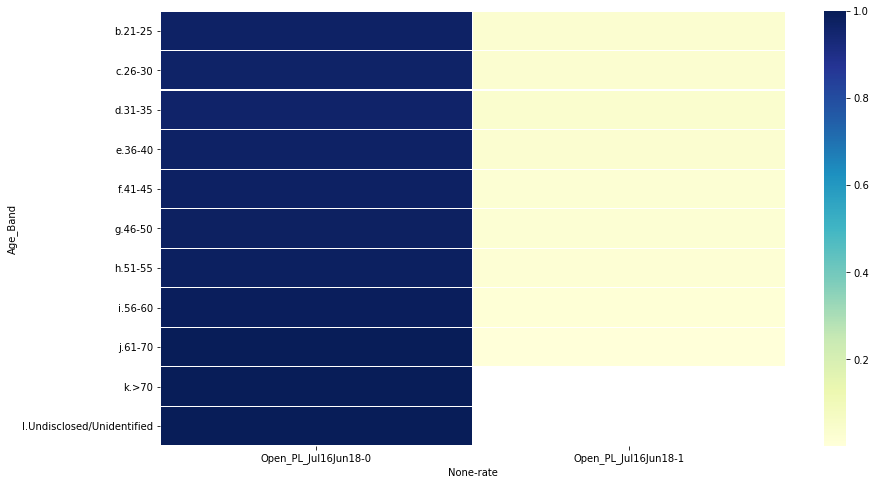

In [61]:
plot_heatmap(df,'Open_PL_Jul16Jun18')

In [57]:
def outliers(num_col)   :
    plt.figure(figsize=(14, 12))
    #df_top10 = df.where(df['target'].isin(df.target.values))#
    
    sns.boxplot(data=df_top10, x=num_col, y='Age_Band', palette='Paired')
    plt.title('Salary Distribution in the Top 10 Countries', fontsize=16)
    sns.despine(left=True)
outliers('Gross_Annual_Income')

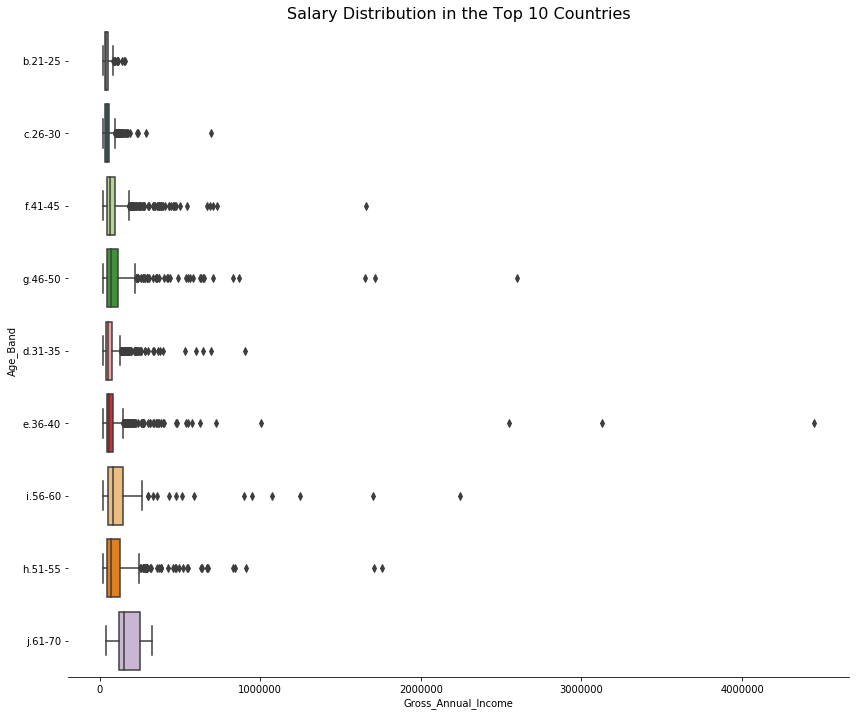

In [58]:
outliers('Gross_Annual_Income')

In [59]:
df.columns

Index(['CIFNO', 'SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'target', 'casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m',
       'outflow_behav_change', 'casa_inflow_123m', 'inflow avg_3m',
       'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change'],
      dtype='object')

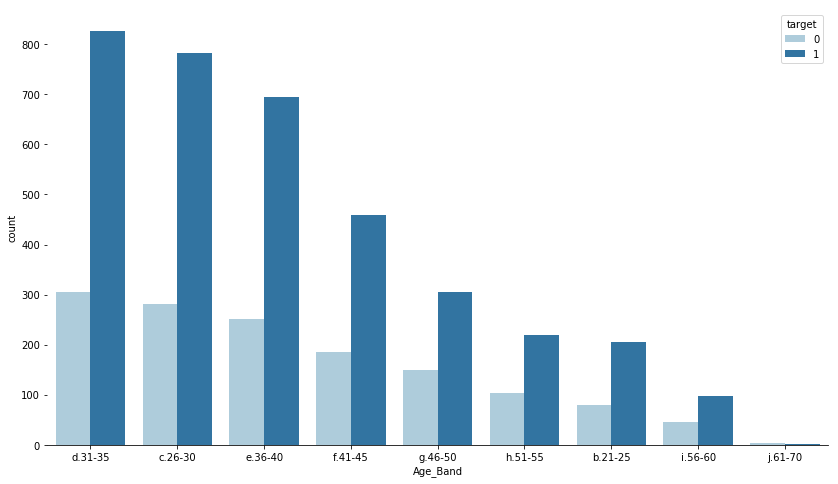

In [67]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Age_Band', hue='target', palette='Paired', order=df['Age_Band'].value_counts()[:10].index)
sns.despine(left=True)

In [ ]:
df.groupby(['cluster']).mean()

In [68]:
#univarite analysis
df[df.state.isin(['WA', 'OR', 'CA'])].head()
reviews['province'].value_counts().head(10).plot.bar()
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()
reviews['points'].value_counts().sort_index().plot.bar()#use for continuous numbers
reviews['points'].value_counts().sort_index().plot.line()
reviews['points'].value_counts().sort_index().plot.area()
reviews[reviews['price'] < 200]['price'].plot.hist()
reviews['price'].plot.hist()

AttributeError: 'DataFrame' object has no attribute 'state'

In [ ]:
#bivariate analysis
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)
wine_counts.plot.bar(stacked=True)
wine_counts.plot.area()#wine counts contains full of numeric data
wine_counts.plot.line()

In [ ]:
#using seaborn
sns.countplot(reviews['points'])
sns.kdeplot(reviews.query('price < 200').price)
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

In [4]:
df.columns

Index(['CIFNO', 'SCV_Party_ID', 'Age_Band', 'Gender', 'Occupation_Group',
       'Gross_Annual_Income', 'Ethnic', 'Marital_status', 'Seg_Locality',
       'No_of_Prod_Held_BW', 'f_OtherProd', 'target', 'casa_outflow_123m',
       'outflow avg_3m', 'casa_outflow_456m', 'outflow avg_6m',
       'outflow_behav_change', 'casa_inflow_123m', 'inflow avg_3m',
       'casa_inflow_456m', 'inflow avg_6m', 'inflow_behav_change'],
      dtype='object')

C:\Users\VIMAL\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


KeyboardInterrupt: 

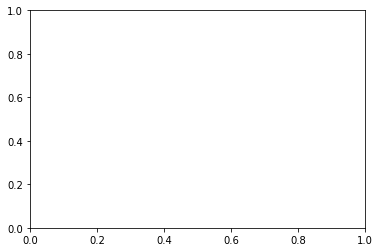

In [10]:
import seaborn as sns
sns.kdeplot(df[df['Gross_Annual_Income'] < 1000000].loc[:, [ 'outflow avg_3m', 'outflow avg_6m']].dropna())
sns.distplot(reviews['points'], bins=10, kde=False)
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)


In [ ]:
df['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))
df['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred'
)

df['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)

In [189]:
def ret(n):
    if n > 9:
        temp = "two digits"
        return temp     #Line 4        
    else :
        temp = "one digit"
        print ("return statement")
        return temp     #Line 8
       #Line 9
   # print ("return statement")
ret(5)

return statement


'one digit'

In [195]:
def count_number_of(x):
    count = 0
    for item in x:
        if item == "what_you_look_for":
            count = count + 1
    return count

In [196]:
count_number_of('what_you_look_for')

0

In [205]:
def fact(x):
    if x < 2:
        return 1
    return x * fact(x - 1)

print(fact(3))

6


In [208]:
def add(a, b):
    print( "ADDING %d + %d" % (a, b))
    return a + b
add (5,6)

ADDING 5 + 6


11

In [211]:

def subtract(a, b):
    print ("SUBTRACTING %d - %d" % (a, b))
    return a - b

def multiply(a, b):
    print ("MULTIPLYING %d * %d" % (a, b))
    return a * b

def divide(a, b):
    print ("DIVIDING %d / %d" % (a, b))
    return a / b

age = add(30, 5)
height = subtract(78, 4)
weight = multiply(90, 2)
iq = divide(100, 2)

ADDING 30 + 5
SUBTRACTING 78 - 4
MULTIPLYING 90 * 2
DIVIDING 100 / 2


In [212]:
print( "Age: %d, Height: %d, Weight: %d, IQ: %d" % (age, height, weight, iq))

Age: 35, Height: 74, Weight: 180, IQ: 50


In [216]:
add(30,5)

ADDING 30 + 5


35

In [217]:
multiply(90, 2)

MULTIPLYING 90 * 2


180

In [218]:
divide(100, 2)

DIVIDING 100 / 2


50.0

In [244]:
x=[1,2,3,4,5,6]
for i in x:
    if i >2:
        def timestwo(x):
            return x*2
        print(i)
    else: 
        print('zeros')
timestwo(i)

zeros
zeros
3
4
5
6


12

In [254]:
df = pd.DataFrame({1:[1,2,3]})
def f(frame):
    frame['new'] = 'a'
f(df) 
df

,1,new
0,1,a
1,2,a
2,3,a


In [253]:
import numpy as np

df['news'] = np.arange(len(df)) 

In [251]:
df.set_index('new')

,1,news
new,,
a,1,0
a,2,1
a,3,2


In [255]:
for column in df.columns[1:]:
    print(df[column])

0    a
1    a
2    a
Name: new, dtype: object
